In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re 

In [4]:
train_df = pd.read_csv("./data/train.csv")
test_df = pd.read_csv("./data/test.csv")

In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_df.set_index(train_df.PassengerId,inplace=True)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,,
1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train_df.drop('PassengerId',axis = 1,inplace =True)

In [8]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 1. Feature Classification: Categorical vs Numerical

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


 Note : Cabin + Age

In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


* Categorical(đặc trưng phân loại): Survived,Pclass,Sex,Embarked,SibSp,Parch
* Numerical(): Age,Fare
* Mix types of data:Ticker,cabin
* Blank or Null( gia tri con thieu): Cabin>Age>Embarket

In [11]:
train_df["Survived"] = train_df["Survived"].astype("category")
features = ["Pclass","Sex","Embarked","SibSp","Parch"]
def convert_cat(df, faetures):
    for feature in features:
        df[feature] = df[feature].astype("category")
convert_cat(train_df, features)
convert_cat(test_df,features)

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(6), float64(2), object(3)
memory usage: 48.2+ KB


### Distribution of Numerical feature values across the samples

In [13]:
train_df.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


### Distribution of category feature

In [14]:
train_df.describe(include=['category'])

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


# 3. Exploreratory Data Analysis(EDA)
## 3.1 Correlating categorical features
(tìm hiểu khám về dữ liệu）

### Target Variable: Survived

In [15]:
train_df.Survived.value_counts().to_frame()
# to_frame chuyen du lieu ve dang dataframe
# value_counts thong ke du lieu trong cot

,Survived
0,549
1,342


In [16]:
train_df.Survived.value_counts(normalize=True).to_frame()

,Survived
0,0.616162
1,0.383838


### Sex

In [17]:
train_df.Sex.value_counts().to_frame()

,Sex
male,577
female,314


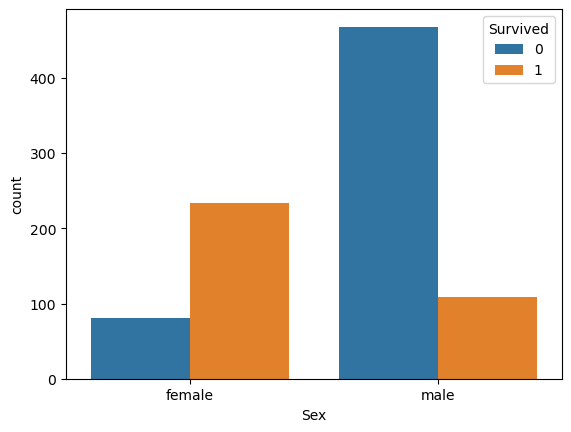

In [18]:
sns.countplot(data=train_df,hue = 'Survived' ,x="Sex");

- Remaining Categorical Feature Columns

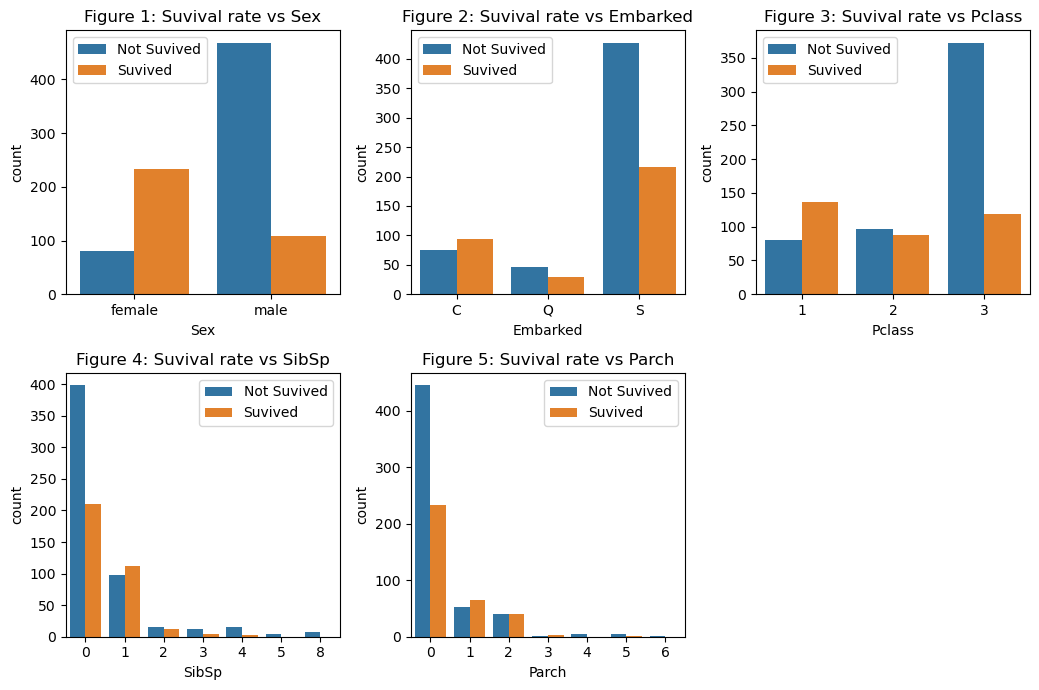

In [19]:
cols = ['Sex','Embarked','Pclass','SibSp','Parch']
n_rows = 2
n_cols =3
fig,ax = plt.subplots(n_rows,n_cols,figsize=(n_cols*3.5,n_rows*3.5))
for r in range(0,n_rows):
    for c in range(0,n_cols):
        i = r*n_cols +c
        if i < len(cols) :
            ax_i = ax[r,c]
            sns.countplot(data = train_df,x= cols[i],hue="Survived",ax =ax_i)
            ax_i.set_title(f"Figure {i+1}: Suvival rate vs {cols[i]}")
            if(i < 3):
                ax_i.legend(title = '', loc = 'upper left', labels =  ['Not Suvived','Suvived'])
            else : 
                ax_i.legend(title = '', loc = 'upper right', labels =  ['Not Suvived','Suvived'])
ax.flat[-1].set_visible(False)
plt.tight_layout();
        

## 3.2 EDA for Numerical Features
* Numerical Features : Age, Fare

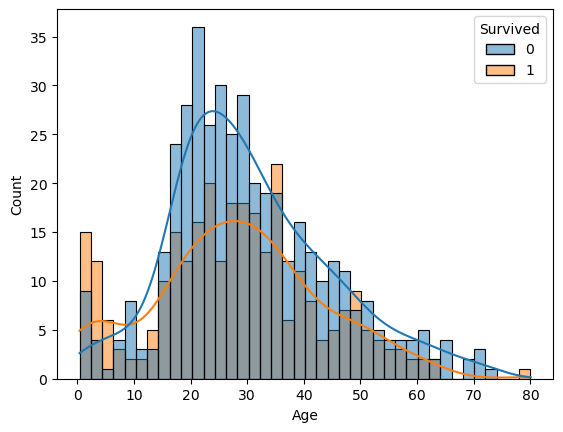

In [20]:
sns.histplot(data = train_df, x= 'Age',hue = "Survived", bins = 40,kde = True);

<Axes: xlabel='Fare', ylabel='Count'>

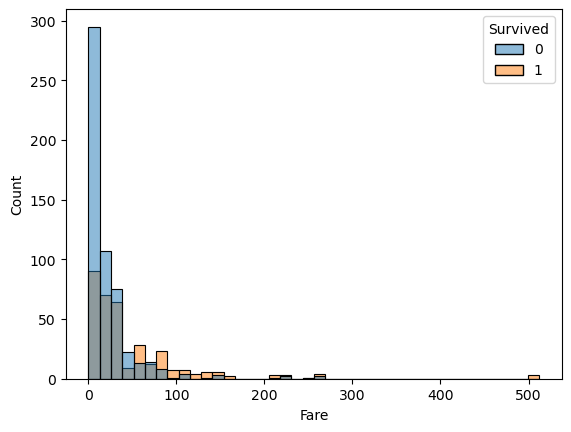

In [21]:
sns.histplot(data = train_df,x = "Fare",hue = "Survived",bins = 40)

## 4. Feature Engineering & Data Wrangling 

# Name
* Regular Expression

In [22]:
train_df["Name"]

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
889             Johnston, Miss. Catherine Helen "Carrie"
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [23]:
def extract_title(name):
    p = re.compile(r",(.+)\.")
    return p.search(name).groups(1)[0].strip()
train_df['Title'] = train_df['Name'].apply(lambda name :extract_title(name)) 
train_df['Title'] = train_df['Title'].astype("category") 


In [25]:
test_df['Title'] =  test_df['Name'].apply(lambda name : extract_title(name))

In [26]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
 11  Title     891 non-null    category
dtypes: category(7), float64(2), object(3)
memory usage: 49.7+ KB


In [27]:
def group_title(title):
    if title in ["Mr","Miss","Mrs","Master"]:
        return title
    elif title == "Ms":
        return "Miss"
    else:
        return "Other"

In [28]:
train_df["Title"] = train_df["Title"].apply(lambda title : group_title(title))
test_df["Title"] = test_df["Title"].apply(lambda title : group_title(title))

In [29]:
train_df["Title"].value_counts()
test_df["Title"].value_counts()

Mr        240
Miss       79
Mrs        72
Master     21
Other       6
Name: Title, dtype: int64

<Axes: xlabel='Title', ylabel='count'>

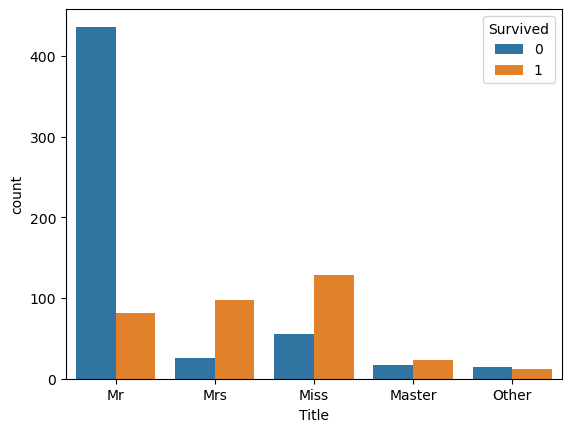

In [30]:
sns.countplot(data = train_df, x = "Title",hue = "Survived")

# Family 
* Sibsp,Parch


In [31]:
train_df["Family_size"] = train_df.SibSp.astype('int') + train_df.Parch.astype('int')+1
test_df["Family_size"] = test_df.SibSp.astype("int") + test_df.Parch.astype("int")+1

In [32]:
train_df["Family_cut"] = pd.cut(train_df.Family_size,bins = [0,1,4,6,20], labels = ["Solo","Small","Medium","Large"])
test_df["Family_cut"] = pd.cut(test_df.Family_size,bins = [0,1,4,6,20], labels = ["Solo","Small","Medium","Large"])

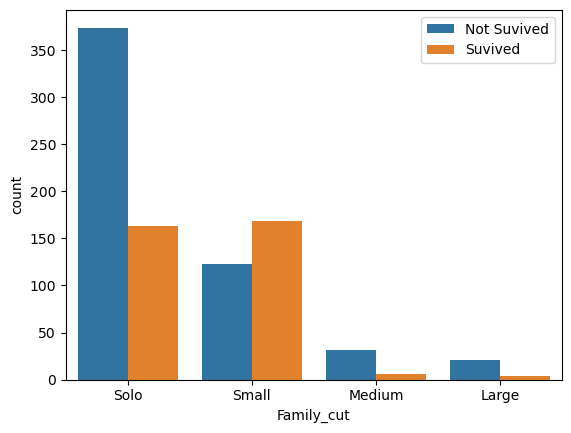

In [33]:
fig, ax = plt.subplots()
sns.countplot(data = train_df,x = "Family_cut",hue = "Survived" )
ax.legend(title = '', loc = 'upper right', labels =  ['Not Suvived','Suvived'])

In [34]:
test_df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Pclass       418 non-null    category
 2   Name         418 non-null    object  
 3   Sex          418 non-null    category
 4   Age          332 non-null    float64 
 5   SibSp        418 non-null    category
 6   Parch        418 non-null    category
 7   Ticket       418 non-null    object  
 8   Fare         417 non-null    float64 
 9   Cabin        91 non-null     object  
 10  Embarked     418 non-null    category
 11  Title        418 non-null    object  
 12  Family_size  418 non-null    int64   
 13  Family_cut   418 non-null    category
dtypes: category(6), float64(2), int64(2), object(4)
memory usage: 30.0+ KB


# 4.2 Data Wranging 

In [39]:
num_features = ["Age","Fare"]
cat_features =["Pclass","Sex","Embarked","Family_cut"]
feature_cols = num_features + cat_features
print(f"fearture_cols: {feature_cols} ")

fearture_cols: ['Age', 'Fare', 'Pclass', 'Sex', 'Embarked', 'Family_cut'] 


In [40]:
def display_missing(df,feature_cols):
    n_rowns = df.shape[0]
    for col in feature_cols:
        missing_count = df[col].isnull().sum()
        if missing_count > 0:
            print(f"{col} has {missing_count*100/n_rowns:.2f} missing value.")

In [42]:
display_missing(train_df,feature_cols)
display_missing(test_df,feature_cols)

Age has 19.87 missing value.
Embarked has 0.22 missing value.
Age has 20.57 missing value.
Fare has 0.24 missing value.


### Filling missing values
#### Age

In [43]:
age_by_sex_pclass = train_df.groupby(['Sex','Pclass'])['Age'].median()
age_by_sex_pclass

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

 ##### Filling the missing values in Age with the medians of sex and Pclass groups

In [44]:
train_df['Age'] = train_df.groupby(['Sex','Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))

In [45]:
test_df['Age'] = test_df.groupby(['Sex','Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))

In [46]:
x = train_df[feature_cols]
y = train_df["Survived"]

In [47]:
x_test = test_df[feature_cols]

In [55]:
# preprocess pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer 
from sklearn.pipeline import Pipeline

In [56]:
num_transformer = Pipeline(steps =  [
    ('imputer', SimpleImputer(strategy = 'median')),
    ('scaler',StandardScaler())
]) 

cat_transformer =  Pipeline(steps =  [
    ('imputer', SimpleImputer(strategy = 'most_frequent')),
    ('encoder',OneHotEncoder(handle_unknown =  'ignore'))
]) 

<Axes: >

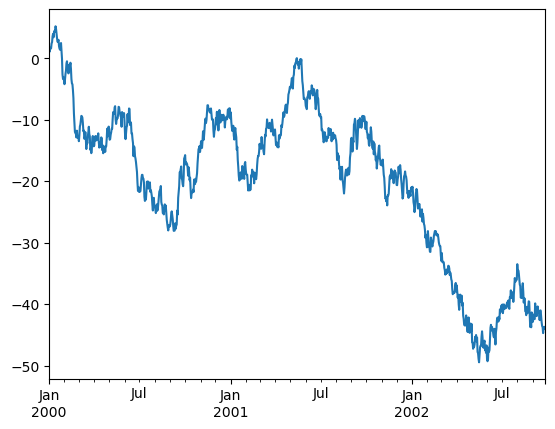